In [1]:
import numpy as np   
import os, gzip
from sklearn.decomposition import PCA
import time
from sklearn import svm
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
# 可视化的库
import matplotlib.pyplot as plt
import seaborn as sns


def load_data(data_folder):#加载本地mnist数据集
    files = [
          'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
          't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]
    paths = []
    for fname in files:
        paths.append(os.path.join(data_folder,fname))       
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)       
    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)           
    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)        
    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)   
    return (x_train, y_train), (x_test, y_test)
(train_images, train_labels), (test_images, test_labels) = load_data('data')
train_data=train_images.reshape(60000,784)
test_data=test_images.reshape(10000,784)


print ("mnist data loaded")
print ("original training data shape:",train_images.shape)
print ("original testing data shape:",test_images.shape)

mnist data loaded
original training data shape: (60000, 28, 28)
original testing data shape: (10000, 28, 28)


In [2]:
#将每张图片展开到一维
train_data=train_images.reshape(60000,784)
test_data=test_images.reshape(10000,784)
print ("training data shape after reshape:",train_data.shape)
print ("testing data shape after reshape:",test_data.shape)

training data shape after reshape: (60000, 784)
testing data shape after reshape: (10000, 784)


Sum Axis-1 as Classification accuracy: 87.66000000000001


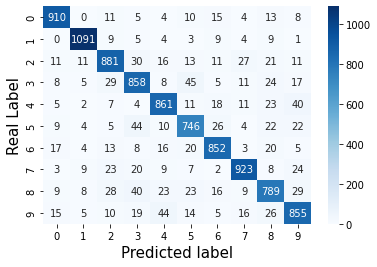

In [3]:
#决策树
dtModel = DecisionTreeClassifier()  # 建立模型
dtModel.fit(train_data,train_labels)  
prediction = dtModel.predict(test_data)  
# plt.figure(figsize=(10,7)) 
cm = confusion_matrix(test_labels,  prediction) 

ax = sns.heatmap(cm, annot=True, fmt="d",cmap='Blues')  
plt.ylabel('Real Label',fontsize=15)  # x轴标题
plt.xlabel('Predicted label',fontsize=15)  # y轴标题

acc = accuracy_score(test_labels,prediction)  
print(f"Sum Axis-1 as Classification accuracy: {acc* 100}")


In [4]:
#KNN
#对降维后的mnist进行KNN分类
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_labels)
#计算测试得分
prediction = knn.predict(test_data)  
# knn.score(test_data, test_labels)

acc = accuracy_score(test_labels,prediction)  
print(f"Sum Axis-1 as Classification accuracy: {acc* 100}")

Sum Axis-1 as Classification accuracy: 97.05


In [7]:
#SVM
print (time.strftime('%Y-%m-%d %H:%M:%S'))
# 传递训练模型的参数，这里用默认的参数
clf = svm.SVC()
# clf = svm.SVC(C=8.0, kernel='rbf', gamma=0.00,cache_size=8000,probability=False)
# 进行模型训练
clf.fit(train_data, train_labels)
# test
# 测试集测试预测结果
predictions = [int(a) for a in clf.predict(test_data)]
num_correct = sum(int(a == y) for a, y in zip(predictions, test_labels))
print ("%s of %s test values correct." % (num_correct, len(test_labels)))
print (time.strftime('%Y-%m-%d %H:%M:%S'))
#11m9.1s 9792 of 10000 test values correct

2022-06-16 08:44:30
9792 of 10000 test values correct.
2022-06-16 08:50:00


In [6]:
#SVM降维
#利用主成分分析对数据进行降维
#降维的主要原因是在原有数据的784维特征空间内进行SVM的计算开销过大
#因此采用PCA算法提取出原有数据的主要特征
#提取了原有图片的100个主要特征，并构建了100维的特征空间
pca = PCA(n_components = 100)
pca.fit(train_data) #fit PCA with training data instead of the whole dataset
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)
print("PCA completed with 100 components")
print ("training data shape after PCA:",train_data_pca.shape)
print ("testing data shape after PCA:",test_data_pca.shape)
print (time.strftime('%Y-%m-%d %H:%M:%S'))
# 传递训练模型的参数，这里用默认的参数
clf = svm.SVC() 
# clf = svm.SVC(C=8.0, kernel='rbf', gamma=0.00,cache_size=8000,probability=False)
# 进行模型训练
clf.fit(train_data_pca, train_labels)
# test
# 测试集测试预测结果
predictions = [int(a) for a in clf.predict(test_data_pca)]
num_correct = sum(int(a == y) for a, y in zip(predictions, test_labels))
print ("%s of %s test values correct." % (num_correct, len(test_labels)))
print (time.strftime('%Y-%m-%d %H:%M:%S'))
#3m 34.3s  9838 of 10000 test values correct

PCA completed with 100 components
training data shape after PCA: (60000, 100)
testing data shape after PCA: (10000, 100)
2022-06-16 08:42:34
9844 of 10000 test values correct.
2022-06-16 08:44:30
